In [17]:
# Import data into Python
# To include all years in our analysis using Pandas

import pandas as pd
from datetime import datetime

# Load the data from CSV
data = pd.read_csv('distinct_records.csv')

In [18]:
# Convert InvoiceDate from text format 'MM/DD/YYYY HH:MM' to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')


In [19]:
# Calculate total revenue per country for all years
data['TotalRevenue'] = data['Quantity'] * data['Price']
country_revenue = data.groupby('Country')['TotalRevenue'].sum().reset_index()

In [20]:
# Display the first few rows of the data
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalRevenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [21]:
# Sort the countries by revenue in descending order
country_revenue = country_revenue.sort_values(by='TotalRevenue', ascending=False)

# Display the top 10 countries by revenue for all years
print(country_revenue.head(10))

           Country  TotalRevenue
40  United Kingdom  1.598606e+07
11            EIRE  6.099538e+05
26     Netherlands  5.483307e+05
15         Germany  4.119592e+05
14          France  3.217334e+05
0        Australia  1.664444e+05
36     Switzerland  9.940306e+04
34           Spain  9.101344e+04
35          Sweden  8.777552e+04
10         Denmark  6.445959e+04


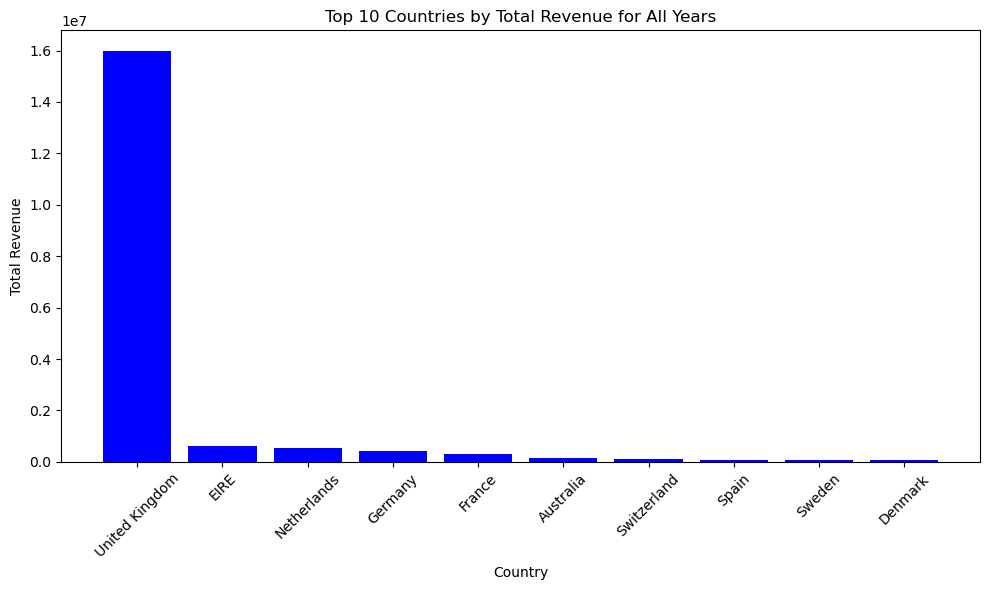

In [22]:
# Create a bar plot for the top 10 countries by revenue for all years
import matplotlib.pyplot as plt

# Plotting the top 10 countries by revenue for all years
plt.figure(figsize=(10, 6))
plt.bar(country_revenue['Country'].head(10), country_revenue['TotalRevenue'].head(10), color='blue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top 10 Countries by Total Revenue for All Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# To compare revenue by country year over year, we first need to extract the year from the InvoiceDate and then group the data by both year and country.

# Extract the year from InvoiceDate: extracts the year from the InvoiceDate and creates a new column for it.
data['Year'] = data['InvoiceDate'].dt.year

In [24]:
# Display the first few rows of the data
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalRevenue,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009


In [25]:
# Group by 'Year' and 'Country' to calculate total revenue per country per year
yearly_revenue = data.groupby(['Year', 'Country'])['TotalRevenue'].sum().reset_index()

# Sort the results by year and then by total revenue: The results are sorted first by Year and then by TotalRevenue within each year in descending order.
yearly_revenue = yearly_revenue.sort_values(by=['Year', 'TotalRevenue'], ascending=[True, False])

# Function to get top 10 countries per year
def get_top_countries_per_year(df, top_n=10):
    top_countries_per_year = df.groupby('Year').head(top_n)
    return top_countries_per_year

# Get the top 10 countries for each year
top_10_countries_per_year = get_top_countries_per_year(yearly_revenue, top_n=10)

# Display the header of the table and the top 10 countries for each year
print(top_10_countries_per_year)

    Year         Country  TotalRevenue
23  2009  United Kingdom    724739.230
6   2009            EIRE     19127.940
13  2009     Netherlands     15204.730
9   2009         Germany      9516.040
18  2009           Spain      7918.830
8   2009          France      5555.040
4   2009          Cyprus      3409.780
17  2009        Portugal      2821.580
1   2009         Austria      1998.340
5   2009         Denmark      1384.460
61  2010  United Kingdom   7768808.783
34  2010            EIRE    336862.410
48  2010     Netherlands    257248.910
37  2010         Germany    195461.091
36  2010          France    128418.600
56  2010          Sweden     53576.610
33  2010         Denmark     45588.490
57  2010     Switzerland     43755.530
24  2010       Australia     30322.000
55  2010           Spain     30182.310
99  2011  United Kingdom   7492512.324
87  2011     Netherlands    275877.060
74  2011            EIRE    253963.430
78  2011         Germany    206982.030
77  2011          France 

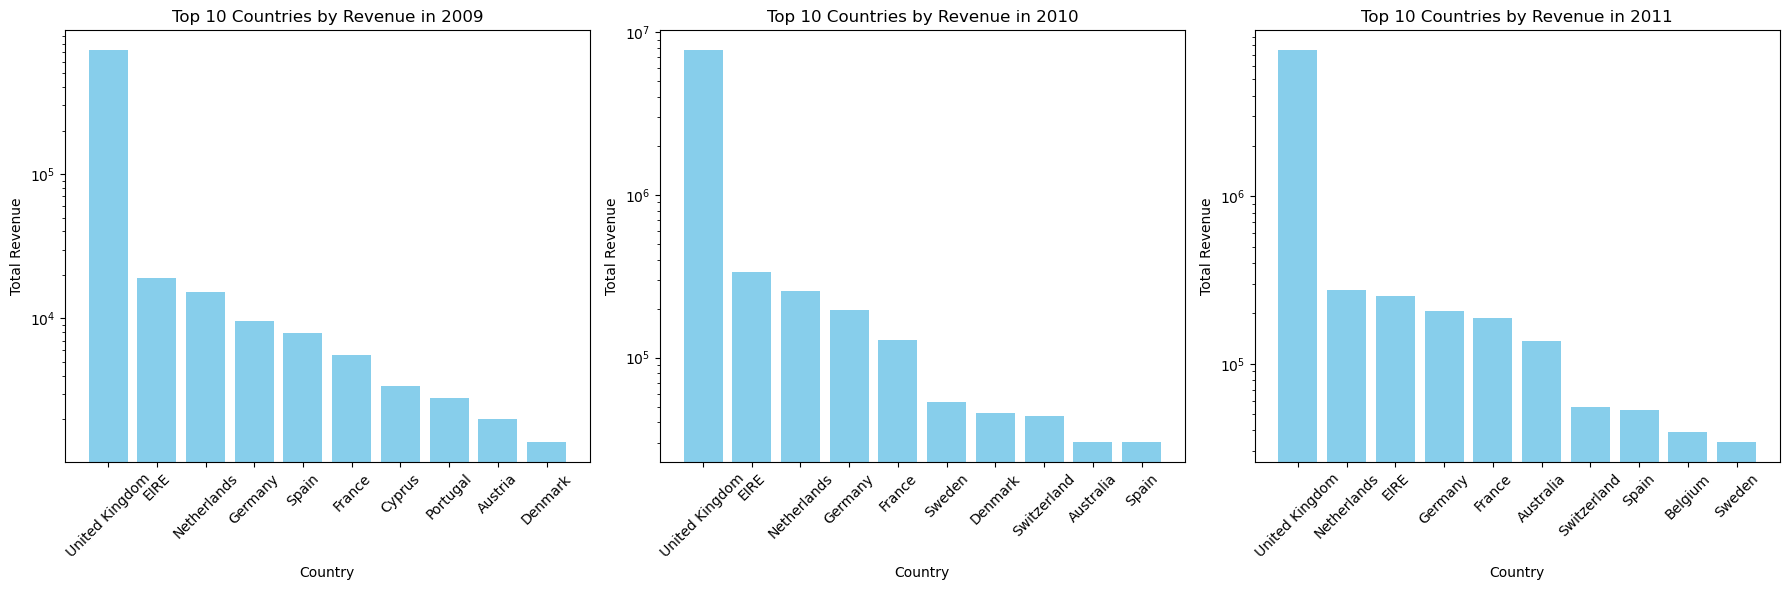

In [26]:
# List of years to plot
years_to_plot = [2009, 2010, 2011]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, year in enumerate(years_to_plot):
    year_data = top_10_countries_per_year[top_10_countries_per_year['Year'] == year]
    axes[i].bar(year_data['Country'], year_data['TotalRevenue'], color='skyblue')
    axes[i].set_title(f"Top 10 Countries by Revenue in {year}")
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel("Total Revenue")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_yscale('log')  # Logarithmic scale for y-axis

plt.tight_layout()
plt.show()

Top 10 Countries with the Highest Revenue Trend:
                 intercept  coefficient
Nigeria     -157460.768696    78.341087
Australia   -126471.134138    62.945176
Japan        -85184.123047    42.403738
Norway       -77850.024205    38.727585
Singapore    -55209.207517    27.485886
Brazil       -53876.622500    26.806389
Netherlands  -41291.979550    20.592078
Lebanon      -38363.207508    19.095255
Sweden       -37486.348877    18.679191
RSA          -28087.656258    13.975793


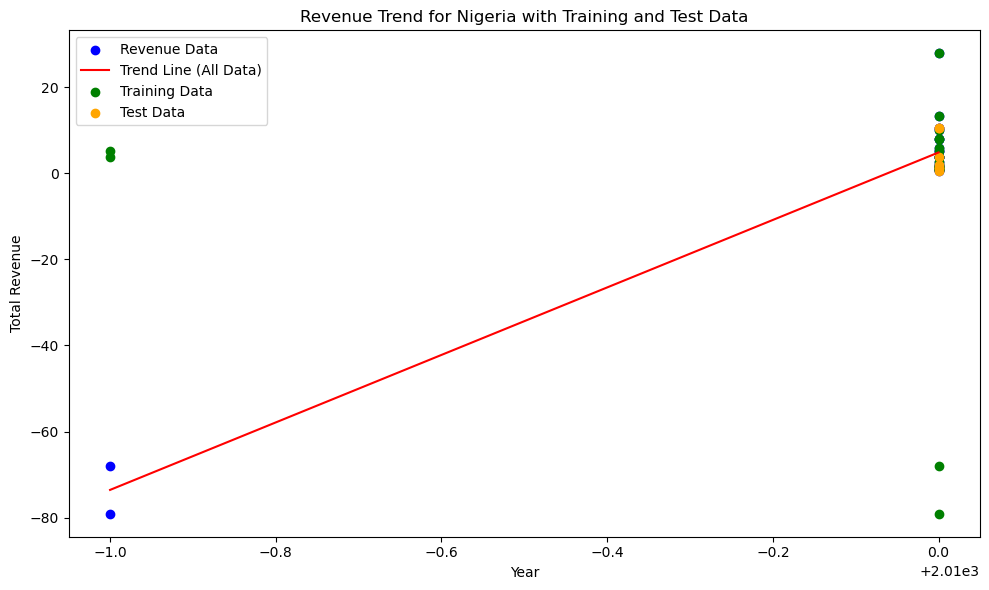

Intercept for Nigeria: -157460.77
Coefficient for Nigeria: 78.34


In [27]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Initialize dictionary to store the results
country_trends = {}

# Group by country and fit a linear regression model for each
for country, group in data.groupby('Country'):
    # Prepare the features and target variable
    X = group['Year'].values.reshape(-1, 1)  # Year as feature
    y = group['TotalRevenue'].values  # Total revenue as target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict the revenue trend on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store the model parameters and prediction results
    country_trends[country] = {
        'intercept': model.intercept_,
        'coefficient': model.coef_[0],
        'years': group['Year'],
        'total_revenue': group['TotalRevenue'],
        'trend_line': model.predict(X.reshape(-1, 1)),  # Full trend line
        'train_pred': y_train_pred,
        'test_pred': y_test_pred,
        'train_true': y_train,
        'test_true': y_test
    }

# Convert the results to a DataFrame for easier analysis
trends_df = pd.DataFrame.from_dict(country_trends, orient='index')

# Sort the DataFrame by 'Coefficient' in descending order to find the top 10 countries
top_countries = trends_df.sort_values(by='coefficient', ascending=False).head(10)

# Display the top 10 countries with the highest revenue trend
print("Top 10 Countries with the Highest Revenue Trend:")
print(top_countries[['intercept', 'coefficient']])

# Plot the revenue trend for the country with the highest trend
top_country = top_countries.iloc[0]  # Get the country with the highest coefficient

# Plot the trend line for the top country
plt.figure(figsize=(10, 6))

# Plot the true revenue data (scatter)
plt.scatter(top_country['years'], top_country['total_revenue'], color='blue', label='Revenue Data')

# Plot the trend line (prediction for all years)
plt.plot(top_country['years'], top_country['trend_line'], color='red', label='Trend Line (All Data)')

# Plot the training and test data (scatter)
plt.scatter(top_country['years'][:len(top_country['train_true'])], top_country['train_true'], color='green', label='Training Data')
plt.scatter(top_country['years'][len(top_country['train_true']):], top_country['test_true'], color='orange', label='Test Data')

# Customize the plot
plt.title(f'Revenue Trend for {top_country.name} with Training and Test Data')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend()
plt.tight_layout()
plt.show()

# Display the coefficients for the top country
print(f"Intercept for {top_country.name}: {top_country['intercept']:.2f}")
print(f"Coefficient for {top_country.name}: {top_country['coefficient']:.2f}")



C:\Users\xiaoy\AppData\Local\Temp\ipykernel_27108\1677134366.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\xiaoy\miniconda3\envs\dsi_participant\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


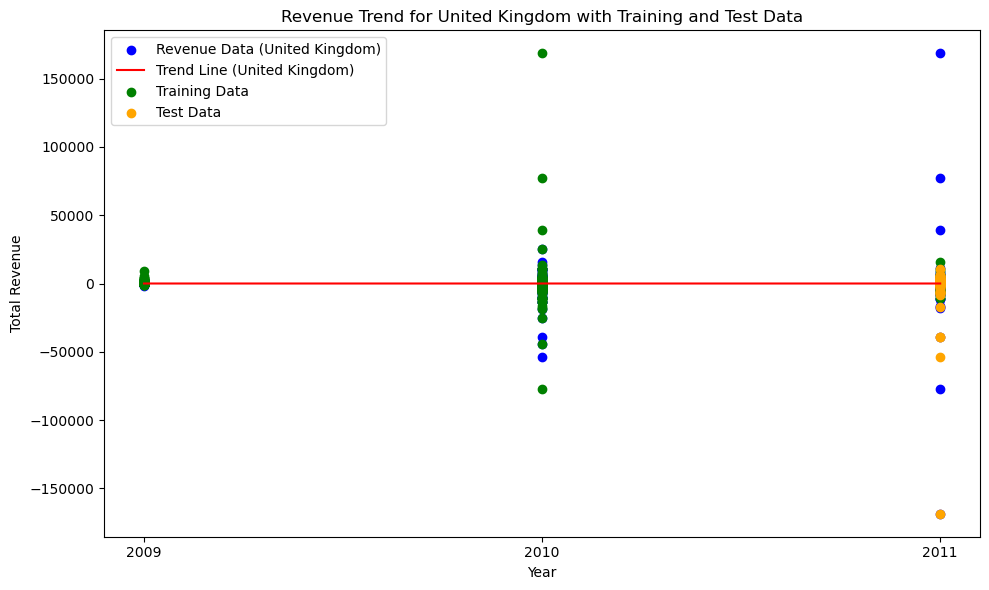

Intercept for United Kingdom: -34.60
Coefficient for United Kingdom: 0.03


In [28]:
# Plot the revenue trend for the United Kingdom
if 'United Kingdom' in country_trends:
    uk_country = country_trends['United Kingdom']
    
    plt.figure(figsize=(10, 6))
    
    # Plot the true revenue data (scatter) for United Kingdom
    plt.scatter(uk_country['years'], uk_country['total_revenue'], color='blue', label='Revenue Data (United Kingdom)')
    
    # Plot the trend line (prediction for all years) for United Kingdom
    plt.plot(uk_country['years'], uk_country['trend_line'], color='red', label='Trend Line (United Kingdom)')
    
    # Plot the training and test data (scatter) for United Kingdom
    plt.scatter(uk_country['years'][:len(uk_country['train_true'])], uk_country['train_true'], color='green', label='Training Data')
    plt.scatter(uk_country['years'][len(uk_country['train_true']):], uk_country['test_true'], color='orange', label='Test Data')
    
    # Customize the plot for United Kingdom
    plt.title('Revenue Trend for United Kingdom with Training and Test Data')
    plt.xlabel('Year')
    plt.ylabel('Total Revenue')
    
    # Set the x-ticks to display the actual years correctly
    plt.xticks(uk_country['years'].unique())  # Use unique years from the data
    
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display the coefficients for the United Kingdom
    print(f"Intercept for United Kingdom: {uk_country['intercept']:.2f}")
    print(f"Coefficient for United Kingdom: {uk_country['coefficient']:.2f}")

The intersection point of the UK and Nigeria trend lines is at: x = 2010.16, y = 17.16


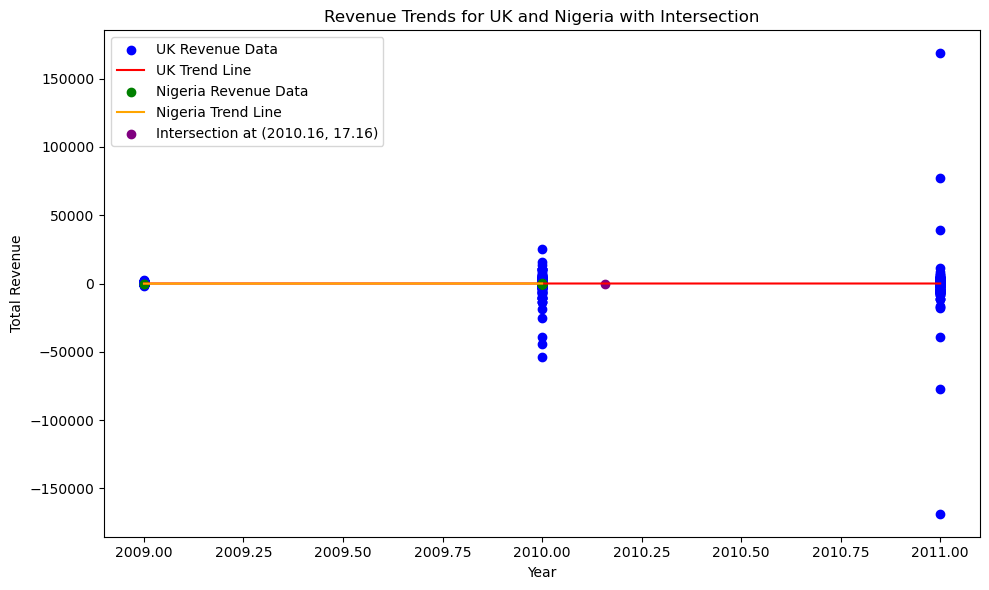

In [32]:
# Find the intersection of the two regression lines

# The equation of the regression lines is:
# y_uk = intercept_uk + coefficient_uk * x
# y_nigeria = intercept_nigeria + coefficient_nigeria * x

# Extract the coefficients and intercepts
intercept_uk, coef_uk = country_trends['United Kingdom']['intercept'], country_trends['United Kingdom']['coefficient']
intercept_nigeria, coef_nigeria = country_trends['Nigeria']['intercept'], country_trends['Nigeria']['coefficient']

# Solve for the intersection point (x)
# intercept_uk + coef_uk * x = intercept_nigeria + coef_nigeria * x
# x = (intercept_nigeria - intercept_uk) / (coef_uk - coef_nigeria)

# Ensure the lines are not parallel (i.e., coefficients are different)
if coef_uk != coef_nigeria:
    # Calculate the x-coordinate of the intersection point
    intersection_x = (intercept_nigeria - intercept_uk) / (coef_uk - coef_nigeria)
    
    # Calculate the y-coordinate by substituting the x value into one of the linear equations (use the UK model)
    intersection_y = intercept_uk + coef_uk * intersection_x
    
    print(f"The intersection point of the UK and Nigeria trend lines is at: x = {intersection_x:.2f}, y = {intersection_y:.2f}")
    
    # Plot the intersection
    plt.figure(figsize=(10, 6))

    # Plot the UK data and trend line
    uk_country = country_trends['United Kingdom']
    plt.scatter(uk_country['years'], uk_country['total_revenue'], color='blue', label='UK Revenue Data')
    plt.plot(uk_country['years'], uk_country['trend_line'], color='red', label='UK Trend Line')

    # Plot the Nigeria data and trend line
    nigeria_country = country_trends['Nigeria']
    plt.scatter(nigeria_country['years'], nigeria_country['total_revenue'], color='green', label='Nigeria Revenue Data')
    plt.plot(nigeria_country['years'], nigeria_country['trend_line'], color='orange', label='Nigeria Trend Line')

    # Plot the intersection point
    plt.scatter(intersection_x, intersection_y, color='purple', label=f'Intersection at ({intersection_x:.2f}, {intersection_y:.2f})')

    plt.title('Revenue Trends for UK and Nigeria with Intersection')
    plt.xlabel('Year')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("The two regression lines are parallel and do not intersect.")
